In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
import requests
from bs4 import BeautifulSoup
city = input("Please enter a city: ")
r = requests.get('http://worldpopulationreview.com/us-cities/' + city + '-population/')
c = r.content
soup = BeautifulSoup(c, "lxml")
soup
main_content = soup.find('div', attrs = {'class': 'section-container clearfix'})
main_content
rows = main_content.find_all('tr')

Please enter a city: seattle


In [3]:
import re
year = []
pop = []
rows = rows[1:]
for row in rows:
    row_td = row.find_all('td')
    str_cells = str(row_td)
    cleantext = BeautifulSoup(str_cells, "lxml").get_text()
    cleantext = cleantext[1:-1]
    text = cleantext.split(', ')
    year.append(int(text[0]))
    pop.append(int(text[1].replace(',', '')))

In [4]:
def augment(xold,yold,numsteps):
    xnew = []
    ynew = []
    for i in range(len(xold)-1):
        difX = xold[i+1]-xold[i]
        stepsX = difX/numsteps
        difY = yold[i+1]-yold[i]
        stepsY = difY/numsteps
        for s in range(numsteps):
            xnew = np.append(xnew,xold[i]+s*stepsX)
            ynew = np.append(ynew,yold[i]+s*stepsY)
    return xnew,ynew

In [5]:
#matplotlib notebook
title = city + ' Population Growth'
overdose = pd.DataFrame(pop,year)
overdose.columns = {title}
x = np.array(overdose.index)
y = np.array(overdose[title])
XN,YN = augment(x,y,10)
augmented = pd.DataFrame(YN,XN)
overdose = augmented
overdose = overdose[::-1]
overdose.columns = {title}
overdose

,seattle Population Growth
1871.0,1343.3
1872.0,1586.6
1873.0,1829.9
1874.0,2073.2
1875.0,2316.5
1876.0,2559.8
1877.0,2803.1
1878.0,3046.4
1879.0,3289.7
1880.0,3533.0


In [6]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=len(overdose[title])/2, metadata=dict(artist='Me'), bitrate=1800)

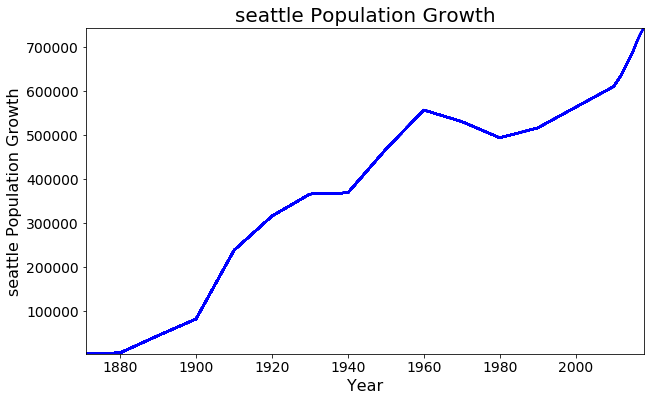

In [7]:
fig = plt.figure(figsize=(10, 6))
plt.xlim(XN[len(XN)-1], XN[0])
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year',fontsize=16)
plt.ylabel('Population',fontsize=16)
plt.title(title,fontsize=20)

def animate(j):
    data = overdose.iloc[:int(j+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="b")
    p.tick_params(labelsize=14)
    plt.setp(p.lines,linewidth=2)
    
ani = animation.FuncAnimation(fig, animate, frames=len(overdose[title]), repeat=True)
ani.save(city + 'PopGrowth.gif', writer='imagemagick', fps=50)